In [ ]:
#[Task a] Load MNIST dataset
# Import required libraries and load the MNIST dataset
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adam
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
#[Task b] Define a basic neural network architecture
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
#[Task c & d] Train and evaluate model using different optimizers
batch_size = 128
epochs = 10

optimizers = {
    "SGD": SGD(),
    "SGD with Momentum": SGD(momentum=0.9),
    "Mini-Batch GD": SGD(),
    "Adagrad": Adagrad(),
    "RMSprop": RMSprop(),
    "Adadelta": Adadelta(),
    "Adam": Adam()
}

full_batch_size = x_train.shape[0]

history_results = {}

model = create_model()
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
print("\nTraining with Full Batch Gradient Descent:")
history = model.fit(x_train, y_train, batch_size=full_batch_size, epochs=epochs,
                    validation_data=(x_test, y_test), verbose=2)
history_results['Gradient Descent'] = history

for name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining with {name}:")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test), verbose=2)
    history_results[name] = history



Training with Full Batch Gradient Descent:
Epoch 1/10
1/1 - 1s - 1s/step - accuracy: 0.0984 - loss: 2.4165 - val_accuracy: 0.0997 - val_loss: 2.4054
Epoch 2/10
1/1 - 1s - 728ms/step - accuracy: 0.1003 - loss: 2.4025 - val_accuracy: 0.1025 - val_loss: 2.3915
Epoch 3/10
1/1 - 1s - 723ms/step - accuracy: 0.1028 - loss: 2.3889 - val_accuracy: 0.1050 - val_loss: 2.3779
Epoch 4/10
1/1 - 1s - 706ms/step - accuracy: 0.1061 - loss: 2.3757 - val_accuracy: 0.1083 - val_loss: 2.3646
Epoch 5/10
1/1 - 1s - 715ms/step - accuracy: 0.1085 - loss: 2.3628 - val_accuracy: 0.1116 - val_loss: 2.3517
Epoch 6/10
1/1 - 1s - 1s/step - accuracy: 0.1123 - loss: 2.3502 - val_accuracy: 0.1144 - val_loss: 2.3390
Epoch 7/10
1/1 - 1s - 794ms/step - accuracy: 0.1158 - loss: 2.3378 - val_accuracy: 0.1178 - val_loss: 2.3265
Epoch 8/10
1/1 - 1s - 1s/step - accuracy: 0.1199 - loss: 2.3257 - val_accuracy: 0.1221 - val_loss: 2.3143
Epoch 9/10
1/1 - 1s - 1s/step - accuracy: 0.1242 - loss: 2.3138 - val_accuracy: 0.1275 - val_

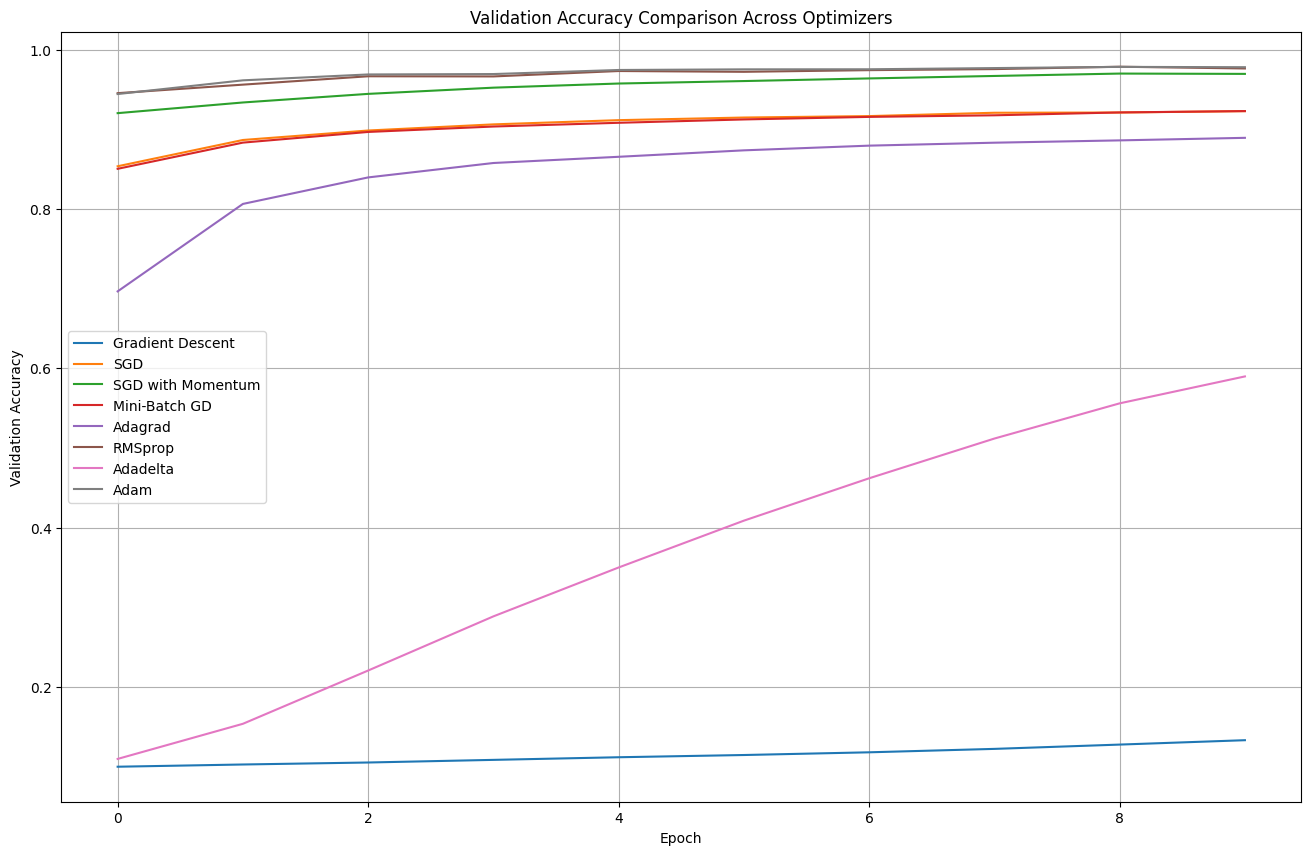

In [ ]:
============

In [ ]:
#[Task e] List Advantages and Disadvantages of each Optimizer

from IPython.display import Markdown

text = """
###Optimizer Comparison

| Optimizer | Advantages | Disadvantages |
|----------|------------|---------------|
| **Gradient Descent (Batch)** | Stable convergence, accurate gradient | Very slow, memory intensive, not scalable |
| **Stochastic Gradient Descent (SGD)** | Faster updates, good for large data | Noisy updates, convergence may oscillate |
| **SGD with Momentum** | Faster convergence, reduces oscillations | Sensitive to momentum value |
| **Mini-Batch Gradient Descent** | Balance between speed & stability | Requires tuning of batch size |
| **Adagrad** | Adapts learning rate per parameter | Aggressive decay of learning rate |
| **RMSProp** | Solves Adagrad's decay issue, good for RNNs | Learning rate still needs tuning |
| **Adadelta** | No need to manually set learning rate | May perform poorly in some scenarios |
| **Adam** | Combines Momentum & RMSProp, works well in most cases | Computationally expensive, not always optimal |
"""
display(Markdown(text))


###Optimizer Comparison

| Optimizer | Advantages | Disadvantages |
|----------|------------|---------------|
| **Gradient Descent (Batch)** | Stable convergence, accurate gradient | Very slow, memory intensive, not scalable |
| **Stochastic Gradient Descent (SGD)** | Faster updates, good for large data | Noisy updates, convergence may oscillate |
| **SGD with Momentum** | Faster convergence, reduces oscillations | Sensitive to momentum value |
| **Mini-Batch Gradient Descent** | Balance between speed & stability | Requires tuning of batch size |
| **Adagrad** | Adapts learning rate per parameter | Aggressive decay of learning rate |
| **RMSProp** | Solves Adagrad's decay issue, good for RNNs | Learning rate still needs tuning |
| **Adadelta** | No need to manually set learning rate | May perform poorly in some scenarios |
| **Adam** | Combines Momentum & RMSProp, works well in most cases | Computationally expensive, not always optimal |
